In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.axes as axes
import datetime
from scipy import stats
from scipy.stats import ttest_ind
from sklearn.linear_model import LogisticRegression
from textblob import TextBlob


sns.set_palette('colorblind')

In [38]:
biden = pd.read_csv("biden_tweets.csv")
trump = pd.read_csv("trump_tweets.csv")

In [39]:
biden.head()

,Unnamed: 0,id,full_text,entities,created_at,favourite,retweets,language,geo,in_reply
0,0,1313663334286323714,Please. https://t.co/acHR1Rf8hE,"{'hashtags': [], 'symbols': [], 'user_mentions...",2020-10-07 02:12:00,90289,14867,en,NaN,NaN
1,1,1313652765319557122,I can’t wait for @KamalaHarris to make history...,"{'hashtags': [], 'symbols': [], 'user_mentions...",2020-10-07 01:30:00,13317,2126,en,NaN,NaN
2,2,1313646473393840128,"Ignore the polls, folks. There’s too much at s...","{'hashtags': [], 'symbols': [], 'user_mentions...",2020-10-07 01:05:00,56278,12104,en,NaN,NaN
3,3,1313641691602202624,Think about what it takes for a Black person t...,"{'hashtags': [], 'symbols': [], 'user_mentions...",2020-10-07 00:46:00,30592,6574,en,NaN,NaN
4,4,1313633890289045504,"Look, folks, I'm going to be honest: we'll try...","{'hashtags': [], 'symbols': [], 'user_mentions...",2020-10-07 00:15:00,13490,3023,en,NaN,NaN


### Get Texts of Each Tweet into a new DataFrame

In [40]:
biden_text = biden['full_text']
trump_text = trump['full_text']

## Get Sentiment of Each Tweet

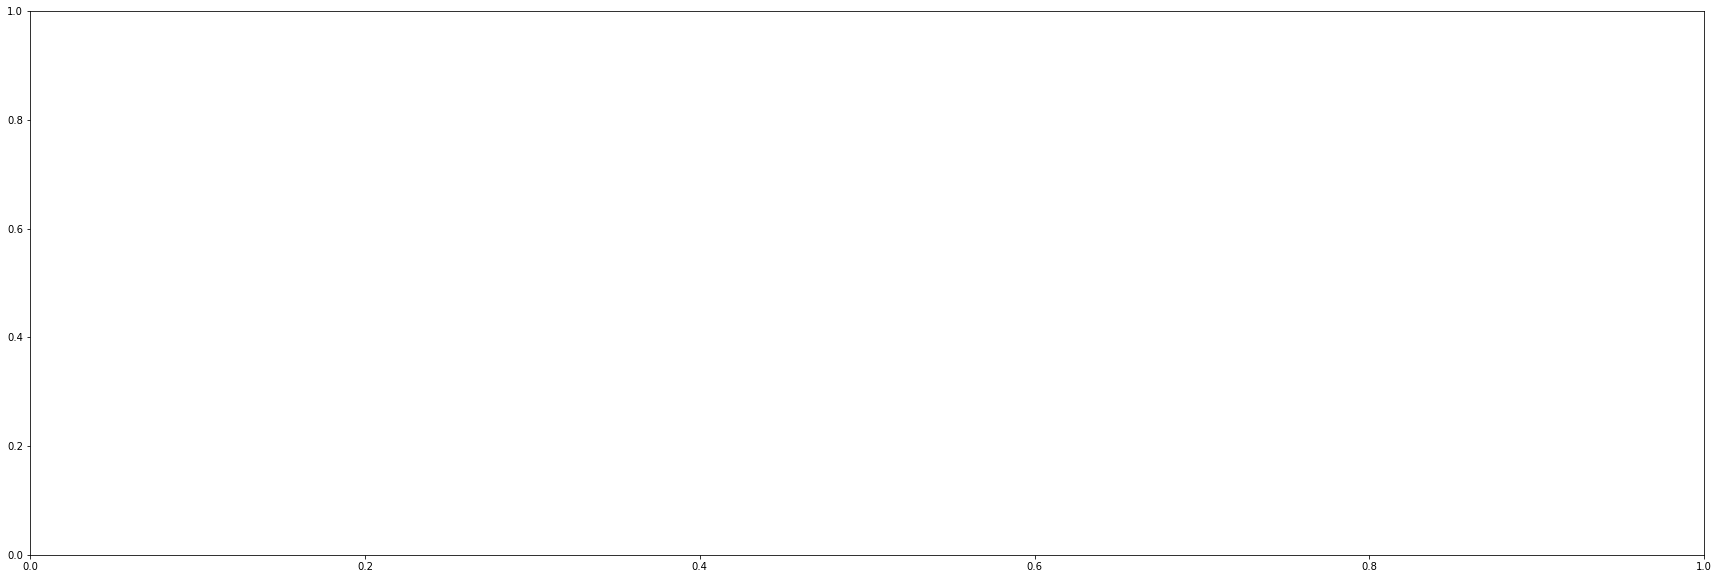

In [49]:
biden_sent_list_polarity = []
biden_sent_list_subjectivity = []
trump_sent_list_polarity = []
trump_sent_list_subjectivity = []
for i in biden_text:
    tweet = TextBlob(i)
    biden_sent_list_polarity.append(tweet.sentiment.polarity)
    biden_sent_list_subjectivity.append(tweet.sentiment.subjectivity)
for i in trump_text:
    tweet = TextBlob(i)
    trump_sent_list_polarity.append(tweet.sentiment.polarity)
    trump_sent_list_subjectivity.append(tweet.sentiment.subjectivity)

trump_sent = pd.DataFrame({'Polarity': trump_sent_list_polarity,
                          'Subjectivity': trump_sent_list_subjectivity})
biden_sent = pd.DataFrame({'Polarity': biden_sent_list_polarity,
                          'Subjectivity': biden_sent_list_subjectivity})

biden_sent["date"] = pd.to_datetime(biden_tweets["created_at"], format = "%Y-%m-%d %H:%M:%S")
trump_sent["date"] = pd.to_datetime(trump_tweets["created_at"], format = "%Y-%m-%d %H:%M:%S")



## Plots 

(array([ 10.,   1.,   0.,   1.,   1.,  14.,   4.,   9.,  14.,  17.,  29.,
         28.,  37.,  57.,  63., 673., 111.,  78.,  79.,  61.,  46.,  57.,
         53.,  21.,  34.,   7.,  13.,   4.,  17.,  68.]),
 array([-1.        , -0.93333333, -0.86666667, -0.8       , -0.73333333,
        -0.66666667, -0.6       , -0.53333333, -0.46666667, -0.4       ,
        -0.33333333, -0.26666667, -0.2       , -0.13333333, -0.06666667,
         0.        ,  0.06666667,  0.13333333,  0.2       ,  0.26666667,
         0.33333333,  0.4       ,  0.46666667,  0.53333333,  0.6       ,
         0.66666667,  0.73333333,  0.8       ,  0.86666667,  0.93333333,
         1.        ]),
 <BarContainer object of 30 artists>)

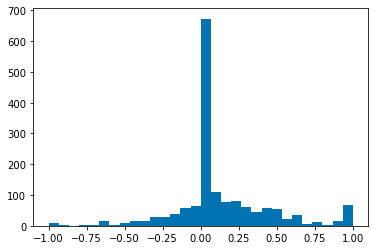

In [60]:

plt.hist(trump_sent['Polarity'],bins = 30)

(array([3.000e+00, 1.000e+00, 0.000e+00, 2.000e+00, 6.000e+00, 1.000e+00,
        1.000e+01, 2.900e+01, 1.100e+01, 3.300e+01, 4.500e+01, 7.600e+01,
        6.800e+01, 1.200e+02, 1.430e+02, 1.033e+03, 2.710e+02, 2.550e+02,
        2.960e+02, 1.470e+02, 1.360e+02, 1.000e+02, 1.370e+02, 4.500e+01,
        3.100e+01, 1.500e+01, 8.000e+00, 4.100e+01, 2.000e+00, 1.900e+01]),
 array([-1.        , -0.93333333, -0.86666667, -0.8       , -0.73333333,
        -0.66666667, -0.6       , -0.53333333, -0.46666667, -0.4       ,
        -0.33333333, -0.26666667, -0.2       , -0.13333333, -0.06666667,
         0.        ,  0.06666667,  0.13333333,  0.2       ,  0.26666667,
         0.33333333,  0.4       ,  0.46666667,  0.53333333,  0.6       ,
         0.66666667,  0.73333333,  0.8       ,  0.86666667,  0.93333333,
         1.        ]),
 <BarContainer object of 30 artists>)

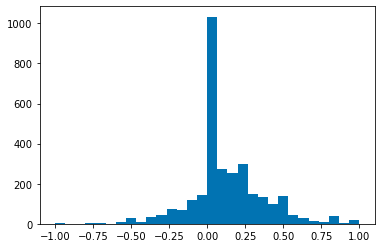

In [62]:
plt.hist(biden_sent['Polarity'], bins = 30)

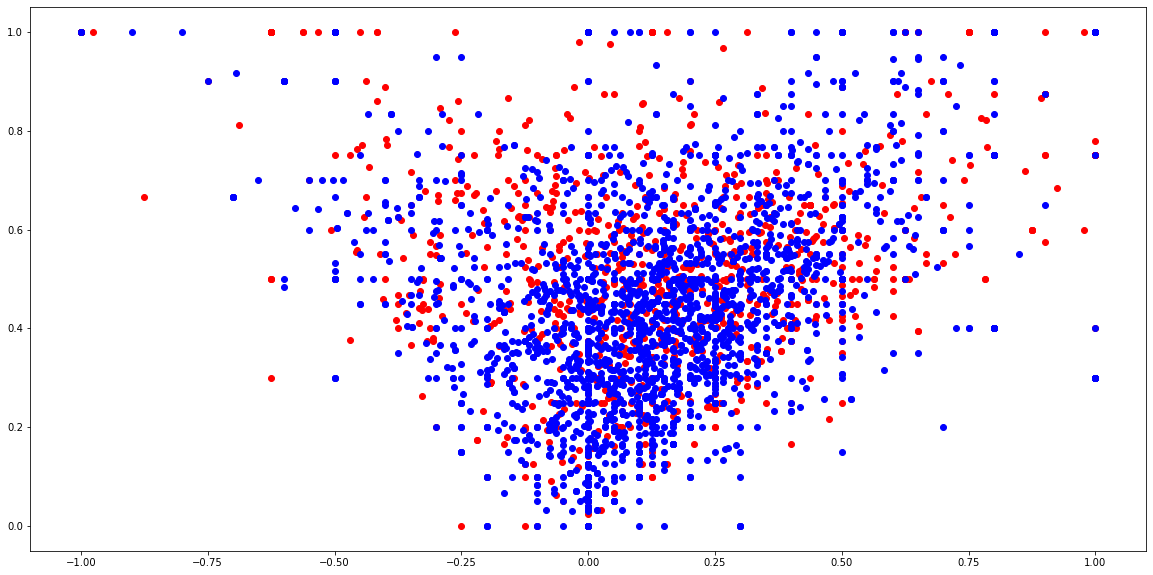

In [58]:
fig, ax = plt.subplots(figsize=(20,10))
plt.scatter(trump_sent['Polarity'], trump_sent['Subjectivity'],color = 'red')
plt.scatter(biden_sent['Polarity'], biden_sent['Subjectivity'], color = 'blue')

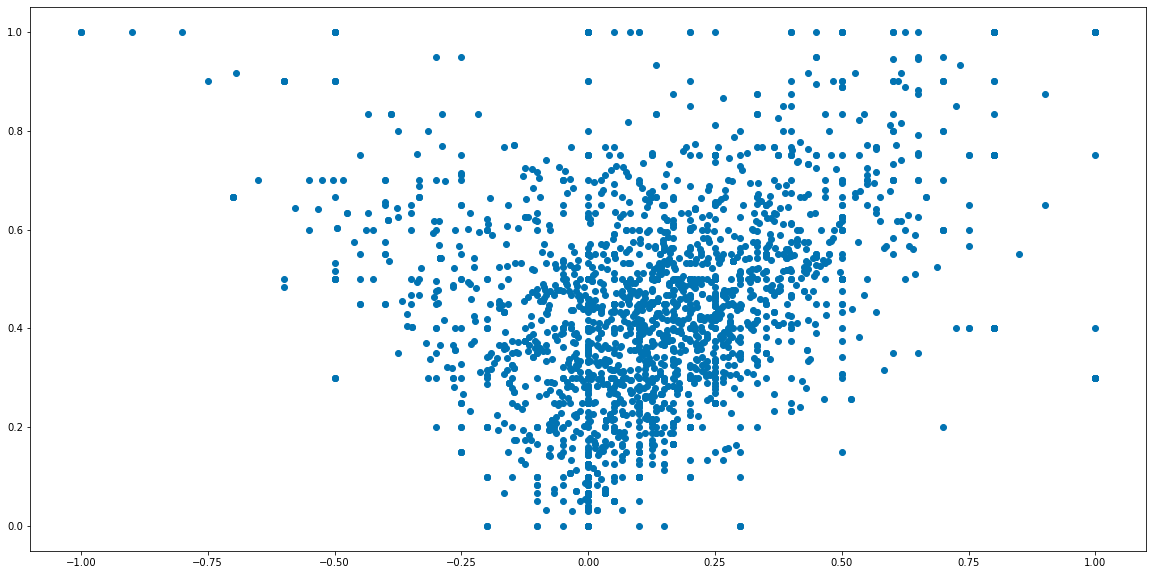

In [28]:
trump_sent.head()

,Polarity,Subjectivity,date
0,0.0,0.0,2020-10-08 02:49:05
1,0.5,0.5,2020-10-08 02:40:57
2,0.0,0.0,2020-10-08 02:24:56
3,0.0,0.0,2020-10-08 02:23:49
4,0.0,0.0,2020-10-08 02:20:57


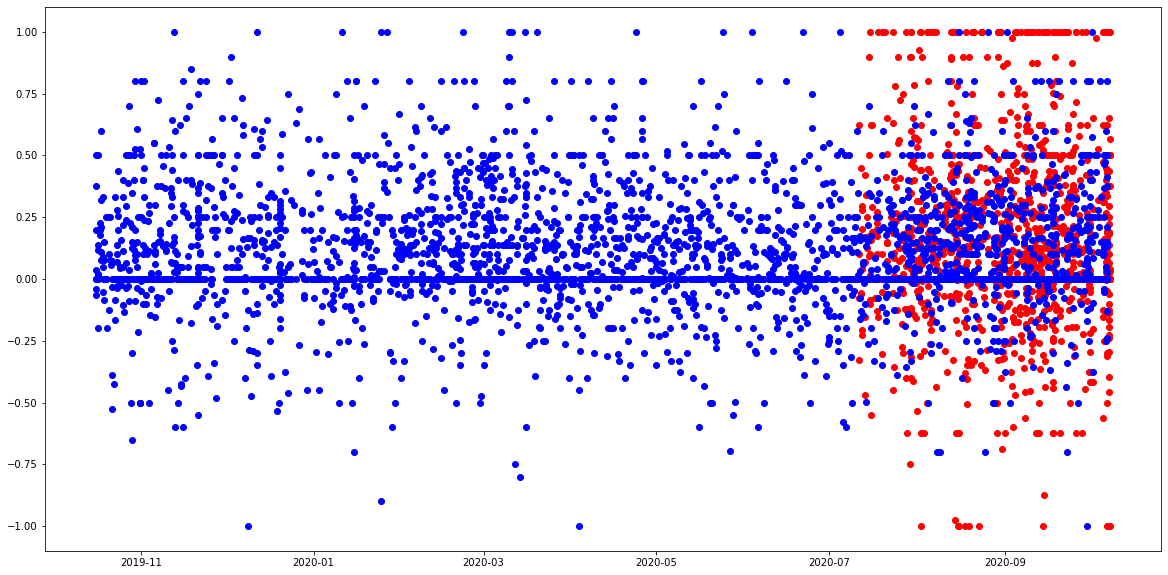

In [59]:
fig, ax = plt.subplots(figsize=(20,10))
plt.scatter(trump_sent['date'],trump_sent['Polarity'],color = 'red')
plt.scatter(biden_sent['date'],biden_sent['Polarity'], color = 'blue')

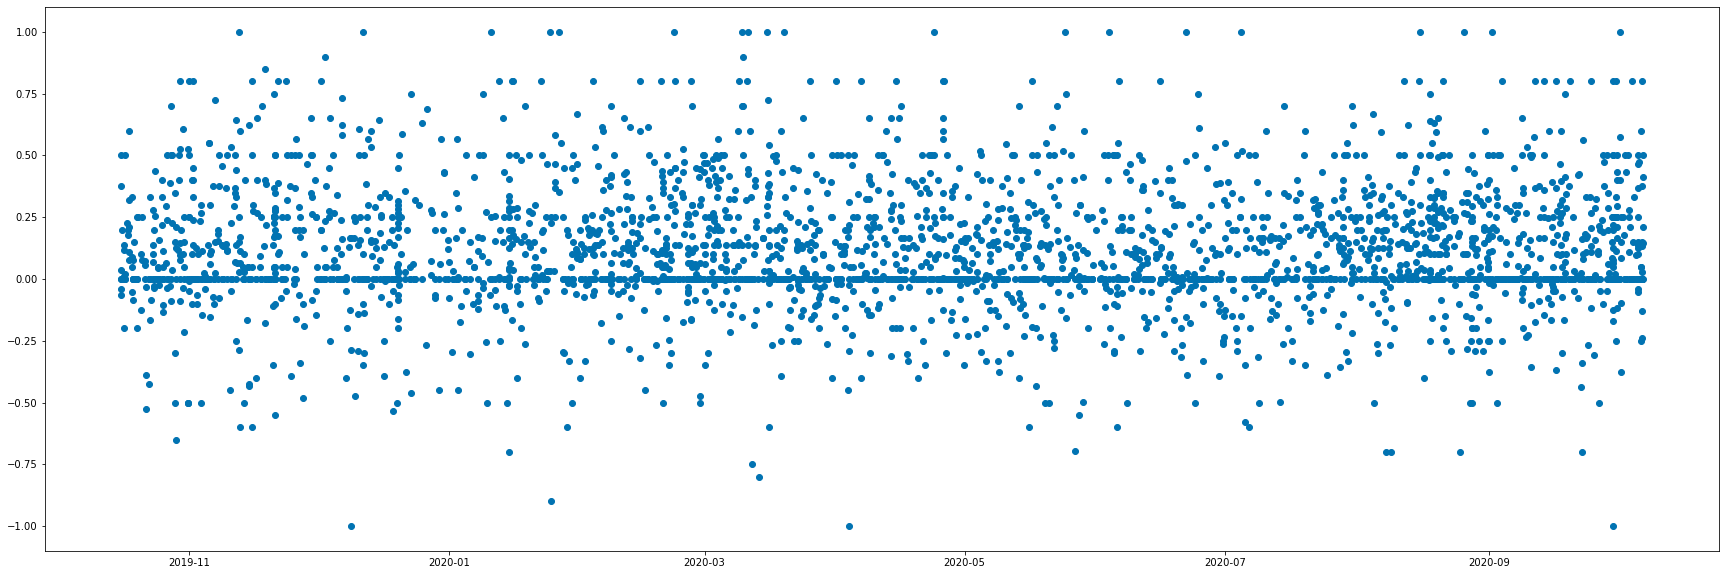

In [48]:
fig, ax = plt.subplots(figsize=(30,10))



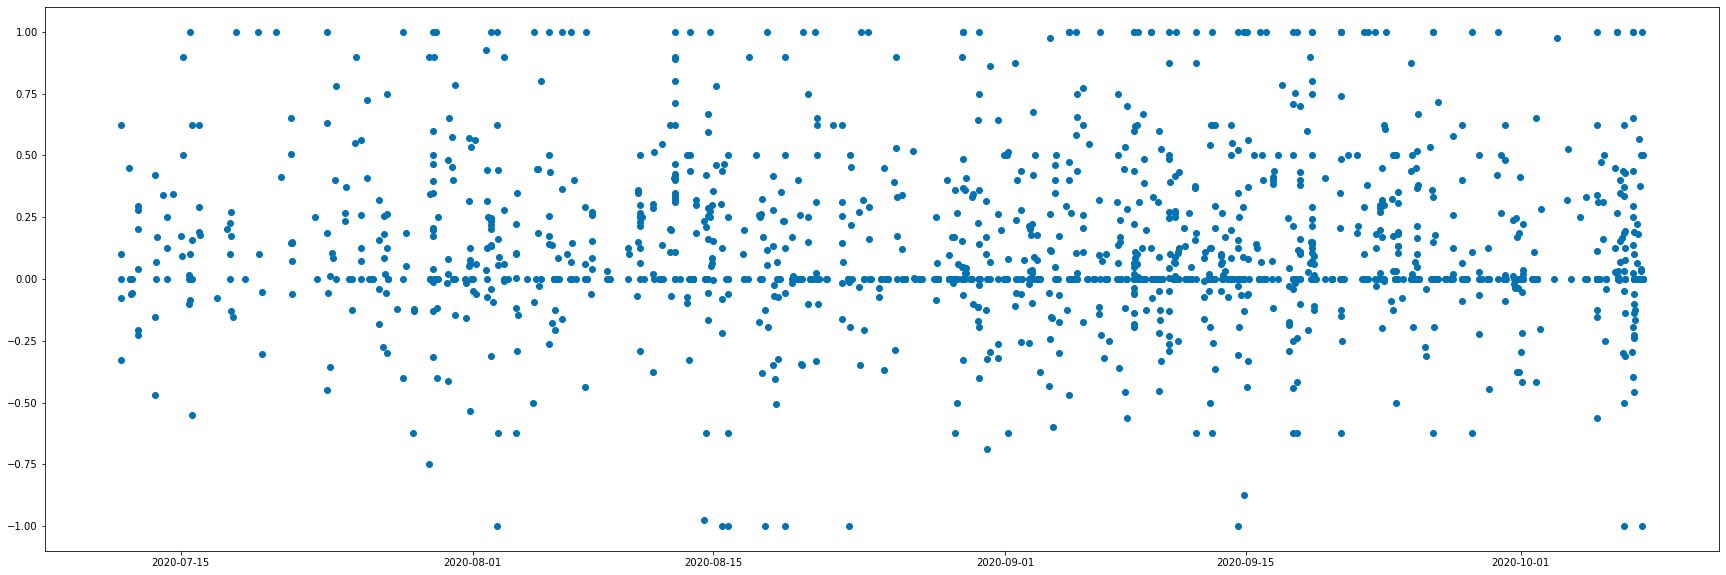

In [56]:
fig, ax = plt.subplots(figsize=(30,10))
plt.scatter(trump_sent['date'],trump_sent['Polarity'])
